In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import streamlit as st

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../data/df_tot.csv")

In [4]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,CNS_stimulants,Cannabis,Nicotine,Hallucinogens,GDP,Politics,Poverty,Serious assault,Sexual violence,Unemployment_Rate
0,2,1,1,UK,39.0,36.0,42.0,37.0,42.0,-0.21712,...,2,0,2,0,40433.93305,0.362917,11.881818,134.043352,75.642036,6.503273
1,1,-1,2,UK,29.0,52.0,55.0,48.0,41.0,-0.71126,...,4,4,4,2,40433.93305,0.362917,11.881818,134.043352,75.642036,3.527909
2,2,-1,1,UK,31.0,45.0,40.0,32.0,34.0,-1.37983,...,0,3,0,1,40433.93305,0.362917,11.881818,134.043352,75.642036,6.948545
3,0,1,2,UK,34.0,34.0,46.0,47.0,46.0,-1.37983,...,2,2,2,0,40433.93305,0.362917,11.881818,134.043352,75.642036,3.315364
4,2,1,2,UK,43.0,28.0,43.0,41.0,50.0,-0.21712,...,1,3,2,2,40433.93305,0.362917,11.881818,134.043352,75.642036,3.315364


# Explore dataset

### Country

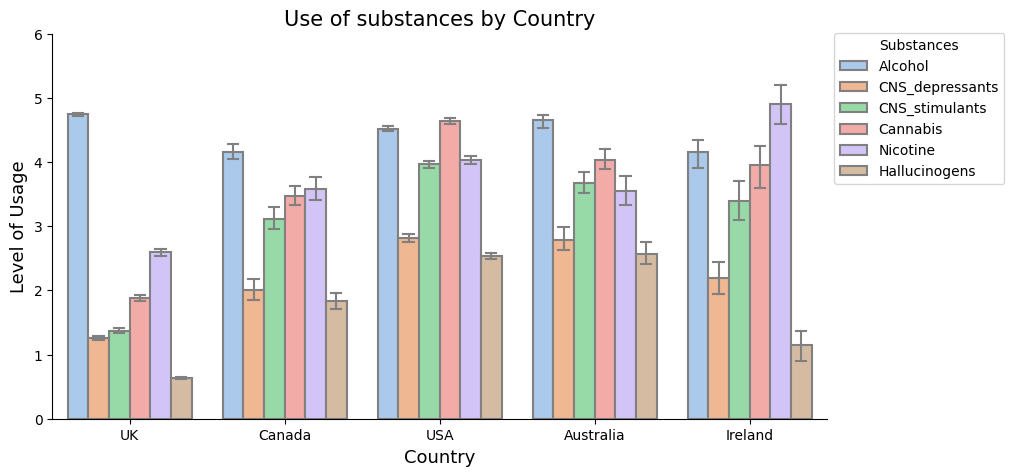

In [130]:
substances_df = df[drugs_country].set_index("Country")

drugs_country = ['Country','Alcohol', 'CNS_depressants','CNS_stimulants', 'Cannabis', 'Nicotine', 'Hallucinogens']

melted_df = substances_df.reset_index().melt(id_vars='Country', var_name='Substance', value_name='Usage')

plt.figure(figsize=(10,5))
sns.barplot(data=melted_df, x = "Country", y="Usage", hue="Substance", errorbar=("ci", 50), capsize=.4,
    err_kws={"color": ".5", "linewidth": 1.5},
    linewidth=1.5, edgecolor=".5", palette = "pastel")

plt.ylim(0,6)
plt.title("Use of substances by Country", fontsize=15)
plt.xlabel("Country", fontsize=13)
plt.ylabel("Level of Usage", fontsize=13)
plt.legend(title='Substances', bbox_to_anchor=(1, 1.02), loc='upper left')
sns.despine(top=True, right=True)

### Education

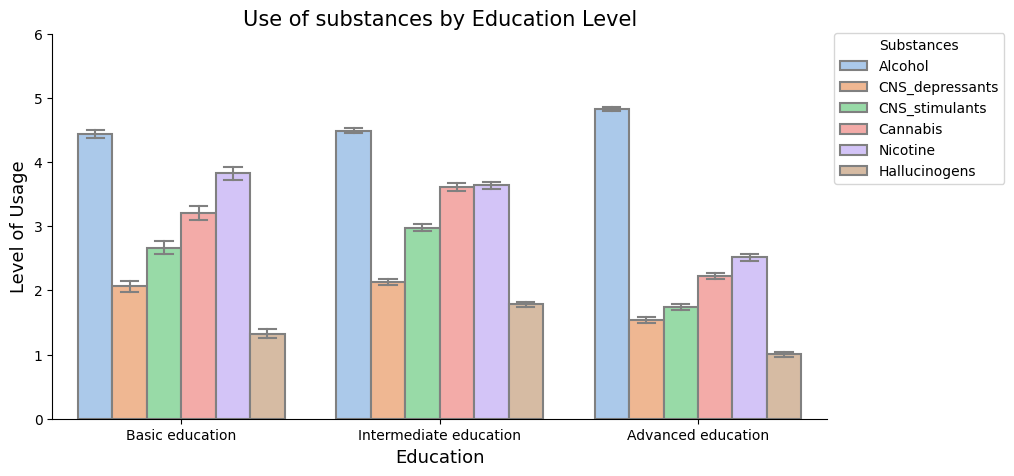

In [129]:
df_plots = df.copy()
map_edu = {0:"Basic education",
           1: "Intermediate education",
           2: "Advanced education"}
df_plots["Education"] = df_plots["Education"].map(map_edu)

drugs_edu = ['Education','Alcohol', 'CNS_depressants','CNS_stimulants', 'Cannabis', 'Nicotine', 'Hallucinogens']
substances_df_edu = df_plots[drugs_edu].set_index("Education")

melted_df = substances_df_edu.reset_index().melt(id_vars='Education', var_name='Substance', value_name='Usage')

plt.figure(figsize=(10,5))
sns.barplot(data=melted_df, x = "Education", y="Usage", hue="Substance", errorbar=("ci", 50), capsize=.4,
    err_kws={"color": ".5", "linewidth": 1.5},linewidth=1.5, edgecolor=".5", palette = "pastel", 
            order=["Basic education", "Intermediate education", "Advanced education"])

plt.ylim(0,6)
plt.title("Use of substances by Education Level", fontsize=15)
plt.xlabel("Education", fontsize=13)
plt.ylabel("Level of Usage", fontsize=13)
plt.legend(title='Substances', bbox_to_anchor=(1, 1.02), loc='upper left')
sns.despine(top=True, right=True)

### Age

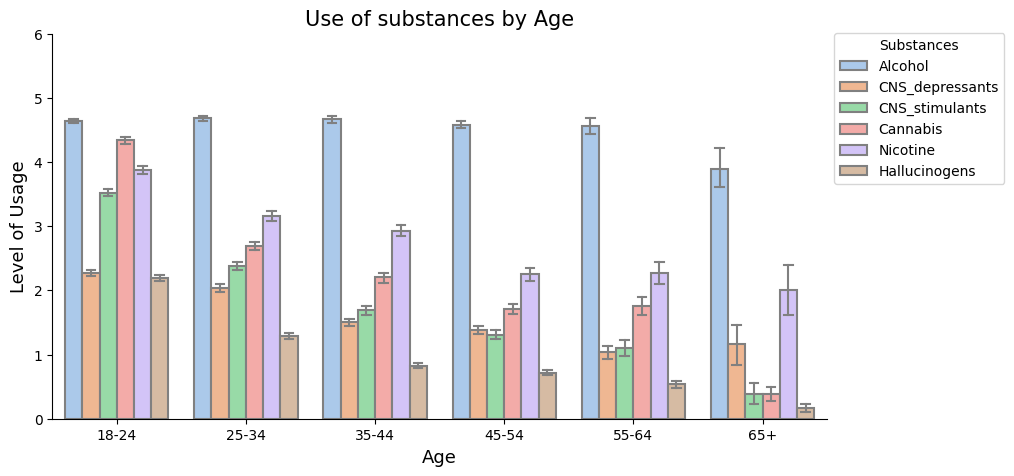

In [128]:
df_plots = df.copy()

map_age = { 0:"18-24",
            1:"25-34",
            2:"35-44",
            3:"45-54",
            4:"55-64",
            5: "65+"}
df_plots["Age"] = df_plots["Age"].map(map_age)

drugs_age = ['Age','Alcohol', 'CNS_depressants','CNS_stimulants', 'Cannabis', 'Nicotine', 'Hallucinogens']
substances_df_age = df_plots[drugs_age].set_index("Age")

melted_df = substances_df_age.reset_index().melt(id_vars='Age', var_name='Substance', value_name='Usage')

plt.figure(figsize=(10,5))
sns.barplot(data=melted_df, x = "Age", y="Usage", hue="Substance", errorbar=("ci", 50), capsize=.4,
    err_kws={"color": ".5", "linewidth": 1.5},linewidth=1.5, edgecolor=".5", palette = "pastel", 
            order=["18-24","25-34","35-44","45-54","55-64","65+"])

plt.ylim(0,6)
plt.title("Use of substances by Age", fontsize=15)
plt.xlabel("Age", fontsize=13)
plt.ylabel("Level of Usage", fontsize=13)
plt.legend(title='Substances', bbox_to_anchor=(1, 1.02), loc='upper left')
sns.despine(top=True, right=True)

### Unemployment Rate

(4.5, 10.0)

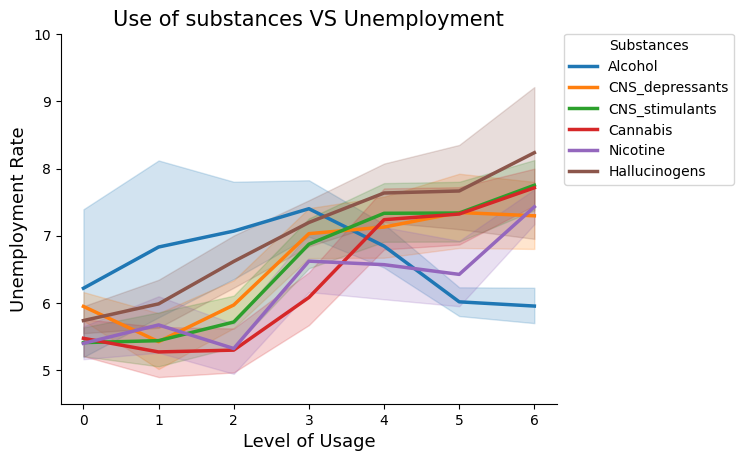

In [127]:
df_plots = df.copy()
drugs_unempl = ['Unemployment_Rate','Alcohol', 'CNS_depressants','CNS_stimulants', 'Cannabis', 'Nicotine', 'Hallucinogens']
substances_df_unempl = df_plots[drugs_unempl].set_index("Unemployment_Rate")


melted_df_unempl = substances_df_unempl.reset_index().melt(id_vars='Unemployment_Rate', 
                                                           var_name='Substance', value_name='Usage')


sns.lineplot(data=melted_df_unempl, x="Usage", y="Unemployment_Rate", hue="Substance", markers=True, linewidth=2.5)

plt.title("Use of substances VS Unemployment", fontsize=15)
plt.xlabel("Level of Usage", fontsize=13)
plt.ylabel("Unemployment Rate", fontsize=13)
plt.legend(title='Substances', bbox_to_anchor=(1, 1.02), loc='upper left')
sns.despine(top=True, right=True)
plt.ylim(4.5,10)

### GDP PPP (fixed for countries)

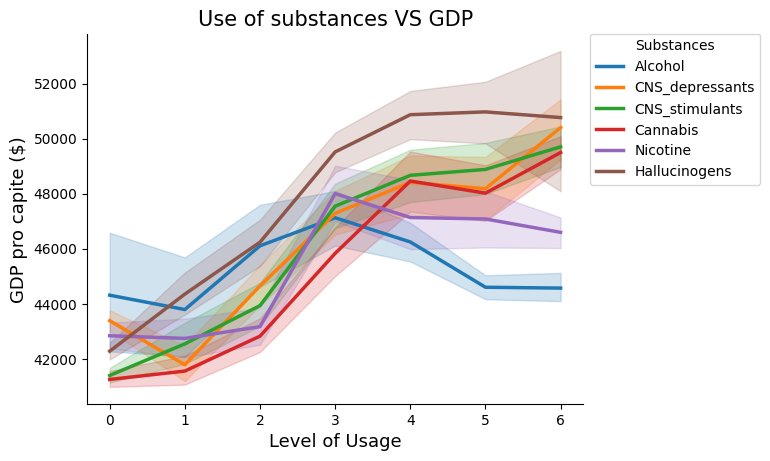

In [126]:
df_plots = df.copy()
drugs_gdp = ['GDP','Alcohol', 'CNS_depressants','CNS_stimulants', 'Cannabis', 'Nicotine', 'Hallucinogens']
substances_df_gdp = df_plots[drugs_gdp].set_index("GDP")

melted_df_gdp = substances_df_gdp.reset_index().melt(id_vars='GDP', 
                                                           var_name='Substance', value_name='Usage')

sns.lineplot(data=melted_df_gdp, x="Usage", y="GDP", hue="Substance", markers=True, linewidth=2.5)

plt.title("Use of substances VS GDP", fontsize=15)
plt.xlabel("Level of Usage", fontsize=13)
plt.ylabel("GDP pro capite ($)", fontsize=13)
plt.legend(title='Substances', bbox_to_anchor=(1, 1.02), loc='upper left')
sns.despine(top=True, right=True)


# Prediction

- Functions to format and standardize the user inputs for Streamlit

In [232]:
df.shape

(1762, 23)

In [231]:
# Streamlit UI function to collect user inputs for country
def collect_country():
    country = st.selectbox("Country", ['Australia', 'Canada', 'Ireland', 'UK', 'USA'])
    return country

def format_political_features(country):
    # Fixed political features
    fixed_political_features = {
        "Australia": [44292.16420986, 0.94992879, 10.6, 150.24454998, 43.81482342],
        "Canada": [43891.22986816, 1.09891699, 13.31818182, 147.19275946, 25.39082926],
        "Ireland": [56635.51385961, 0.98566395, 9.73636364, 75.82689221, 24.43034975],
        "UK": [40433.93304994, 0.36291698, 11.88181818, 134.04335217, 75.64203555],
        "USA": [53821.95755477, 0.51039351, 17.86363636, 245.11261028, 34.16351205]
    }
   
    # Create DataFrame with the fixed political features for the selected country
    country_features = pd.DataFrame([fixed_political_features[country]], columns=["GDP", "Politics", "Poverty", 
                                                                                  "Serious assault", "Sexual violence"])
    
    # Perform one-hot encoding for the country
    encoded_country = pd.DataFrame(columns=['Australia', 'Canada', 'Ireland', 'UK', 'USA'])
    
    # Assign 1 to the selected country's column
    encoded_country[country] = 1
    
    # Assign 0 to all other country columns
    for c in ['Australia', 'Canada', 'Ireland', 'UK', 'USA']:
        if c != country:
            encoded_country[c] = 0
        
        
    # Concatenate the one-hot encoded country and political features with the existing DataFrame
    df = pd.concat([non_selected_countries, encoded_country, country_features], axis=1)
    
    return df


In [230]:
# Streamlit UI function to collect user inputs for age

def collect_age():
    age = st.selectbox("Age", ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"], key="age")
    return age

def format_age(df, age):
    mapping_age = {"18-24" : 0,
                   "25-34": 1,
                   "35-44": 2,
                   "45-54": 3,
                   "55-64": 4,
                   "65+": 5}

    # Map the selected age range to its corresponding numerical value
    age_value = mapping_age[age]

    # Populate the "Age" column with the mapped value
    df["Age"] = age_value
    
    return df

In [212]:
# Streamlit UI function to collect user inputs for gender

def collect_gender():
    return st.radio("Gender", ["Female", "Male"])

def format_gender(df):
    mapping_gender = {"Female" : 1,
                     "Male": -1}

    # Get the selected gender from the user input
    selected_gender = collect_gender()
    
    # Map the selected age range to its corresponding numerical value
    gender_value = mapping_gender[selected_gender]

    # Populate the "Gender" column with the mapped value
    df["Gender"] = gender_value
    
    return df

In [213]:
# Streamlit UI function to collect user inputs for education

def collect_education():
    return st.selectbox("Education", ["Left School at 18 years", "High School Diploma", 
                                      "University Degree", "Masters Degree", "Doctorate Degree"])

def format_edu(df):
    mapping_edu = {"Left School at 18 years": 0,
                   "High School Diploma": 1,
                   "University Degree": 2,
                   "Masters Degree": 2,
                   "Doctorate Degree": 2}

    # Get the selected education from the user input
    selected_edu = collect_education()
    
    # Map the selected age range to its corresponding numerical value
    edu_value = mapping_edu[selected_edu]

    # Populate the "Gender" column with the mapped value
    df["Education"] = edu_value
    
    return df

In [203]:
# Streamlit UI function to calculate the right unemployment rate based on the education, gender and country entered by the user

def get_unemployment_rate(df, education, gender, country):

    unemployment_rates = {
        (0, 1, "Australia"): 9.373909,
        (0, 1, "Canada"): 13.938727,
        (0, 1, "Ireland"): 15.342636,
        (0, 1, "UK"): 9.912545,
        (0, 1, "USA"): 11.944182,
        (1, 1, "Australia"): 5.990455,
        (1, 1, "Canada"): 7.442909,
        (1, 1, "Ireland"): 11.881091,
        (1, 1, "UK"): 6.503273,
        (1, 1, "USA"): 8.231545,
        (2, 1, "Australia"): 3.288273,
        (2, 1, "Canada"): 5.076545,
        (2, 1, "Ireland"): 6.216636,
        (2, 1, "UK"): 3.315364,
        (2, 1, "USA"): 3.926545,
        (0, -1, "Australia"): 9.959909,
        (0, -1, "Canada"): 14.438273,
        (0, -1, "Ireland"): 18.537545,
        (0, -1, "UK"): 11.742455,
        (0, -1, "USA"): 9.562727,
        (1, -1, "Australia"): 9.959909,
        (1, -1, "Canada"): 8.676636,
        (1, -1, "Ireland"): 14.414000,
        (1, -1, "UK"): 6.948545,
        (1, -1, "USA"): 9.088545,
        (2, -1, "Australia"): 3.120545,
        (2, -1, "Canada"): 5.757364,
        (2, -1, "Ireland"): 6.141818,
        (2, -1, "UK"): 3.527909,
        (2, -1, "USA"): 3.852182}
    
    # Get the unemployment rate based on the provided parameters
    rate = unemployment_rates.get((education, gender, country), 0.0)
    
     # Create a new column in the DataFrame for unemployment rate
    df['Unemployment_Rate'] = rate
    
    return df

**Psychological traits**

- *Neuroticism score* (Nscore) -> The user will be input to enter a number between 12 and 60. Higher scores means higher level of anxiety, worry, fear, anger, frustration, envy, jealousy, guilt, depressed mood, and loneliness.

- *Extraversion score* (Escore)-> The user will be input to enter a number between 16 and 59. Higher scores means higher outgoing and social a person. High score for idividual who enjoy being with people, participating in social gatherings, and are full of energy

- *Openness to experience score* (Oscore) -> The user will be input to enter a number between 24 and 60. Higher scores reflect imaginative, curious, and open-minded people.

- *Agreeableness score* (Ascore) -> The user will be input to enter a number between 24 and 60. Higher scores reflect high level of agreeableness, warm, friendly, and tactful person.

- *Conscientiousness score* (Cscore) -> The user will be input to enter a number between 17 and 59. Higher scores reflect high level of self-discipline. These individuals prefer to follow a plan, rather than act spontaneously.

- *Impulsiveness score* (Impulsive) -> Value choosen among these: [-2.55524, -1.37983, -0.71126, -0.21712, 0.19268, 0.52975, 0.88113, 1.29221, 1.86203, 2.90161]. 

- *Sensation score* (SS) -> Value choosen among these: [-2.07848, -1.54858, -1.18084, -0.84637, -0.52593, -0.21575, 0.07987, 0.40148, 0.76540, 1.22470, 1.92173]. Sensation is input about the physical world obtained by our sensory receptors, and perception is the process by which the brain selects, organizes, and interprets these sensations.

In [204]:
# Streamlit UI function to collect user inputs for each psychological trait
# values=x default average values

def collect_Nscore():
    return st.slider("Neuroticism score (Nscore)", min_value=12, max_value=60, value=36) 

def collect_Escore():
    return st.slider("Extraversion score (Escore)", min_value=16, max_value=59, value=37)

def collect_Oscore():
    return st.slider("Openness to experience score (Oscore)", min_value=24, max_value=60, value=42)

def collect_Ascore():
    return st.slider("Agreeableness score (Ascore)", min_value=24, max_value=60, value=40)

def collect_Cscore():
    return st.slider("Conscientiousness score (Cscore)", min_value=17, max_value=59, value=38)

def collect_Impulsive():
    return st.selectbox("Impulsiveness score (Impulsive)", options=[-2.55524, -1.37983, -0.71126, 
                                                                    -0.21712, 0.19268, 0.52975, 0.88113, 
                                                                    1.29221, 1.86203, 2.90161], index=4)

def collect_SS():
    return st.selectbox("Sensation score (SS)", options=[-2.07848, -1.54858, -1.18084, 
                                                         -0.84637, -0.52593, -0.21575, 
                                                         0.07987, 0.40148, 0.76540, 1.22470,
                                                         1.92173], index=5)

# Function to collect scores for all traits
def collect_user_traits():
    trait_scores = {
        "Neuroticism": collect_Nscore(),
        "Extraversion": collect_Escore(),
        "Openness to experience": collect_Oscore(),
        "Agreeableness": collect_Ascore(),
        "Conscientiousness": collect_Cscore(),
        "Impulsiveness": collect_Impulsive(),
        "Sensation": collect_SS()
    }
    return trait_scores

# Function to standardize the features and concatenate horizontally with existing df
def standardize_and_concatenate_features(trait_scores, df):
    
    # Convert trait scores dictionary to DataFrame
    trait_df = pd.DataFrame.from_dict(trait_scores, orient='index', columns=['Score'])
    
    # Standardize the trait features using StandardScaler
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(trait_df)
    
    # Convert standardized features back to DataFrame
    trait_df_scaled = pd.DataFrame(scaled_features, index=trait_df.index, columns=trait_df.columns)
    
    # Concatenate horizontally with existing DataFrame
    concatenated_df = pd.concat([df, trait_df_scaled.T], axis=1)
    
    return concatenated_df

In [225]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size=16, hidden_size1=120, hidden_size2=100, output_size=6):
        super(NeuralNet, self).__init__() # Instantiate out nn.Model 
        # Initiating the layers (fc = fully connected)
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.out = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):  # Define the function to move forward in the network
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = self.out(out)
        out = self.sigmoid(out)
    
        return out

torch.manual_seed(40)    
model = NeuralNet()

In [227]:
# Function to convert DataFrame to tensor
def df_to_tensor(concatenated_df):
    # Convert to numpy array
    np_array = concatenated_df.astype('float64').to_numpy()
    # Convert to tensor
    tensor = torch.FloatTensor(np_array)
    return tensor

# Function to make predictions using the model
def make_predictions(model, tensor):
    with torch.no_grad():
        predictions = model.forward(tensor)
    return predictions

In [229]:
def main():
    st.title("Drug Use Prediction App")

    # Collect user inputs for country
    country = collect_country()

    # Format political features based on country
    df = pd.DataFrame()  # Create an empty DataFrame
    df = format_political_features(country)  # Reassign the DataFrame after formatting political features

    # Collect user inputs for age
    age = collect_age()

    # Format age
    df = format_age(df)

    # Collect user inputs for gender
    gender = collect_gender()

    # Format gender
    df = format_gender(df)

    # Collect user inputs for education
    education = collect_education()

    # Format education
    df = format_edu(df)

    # Collect user inputs for each psychological trait
    trait_scores = collect_user_traits()

    # Standardize and concatenate features
    concatenated_df = standardize_and_concatenate_features(trait_scores, df)

    # Get unemployment rate and update DataFrame
    updated_df = get_unemployment_rate(concatenated_df, education, gender, country)

    tensor = df_to_tensor(updated_df)

    # Make predictions using the model
    predictions = make_predictions(model, tensor)
    
    class_labels = {
        0: 'Alcohol',
        1: 'CNS_depressants',
        2: 'CNS_stimulants',
        3: 'Cannabis',
        4: 'Nicotine',
        5: 'Hallucinogens'
    }

    predicted_labels = []
    for i, prediction in enumerate(predictions):
        class_label = class_labels[i]
        predicted_class = "User" if torch.round(prediction).any().item() == 1 else "Non-User"
        predicted_labels.append((class_label, predicted_class))

    # Display the predictions for each class
    st.title("Predictions for Drug Use")
    for class_label, predicted_class in predicted_labels:
        st.write(f"{class_label}: {predicted_class}")
    
if __name__ == "__main__":
    main()